<a href="https://colab.research.google.com/github/divyaa-vermaa03/Practice_codes/blob/main/Plotting_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#File Path
file_path = "GSE183947_fpkm.csv"

#Read the CSV file
df = pd.read_csv(file_path)

#print first 5 rows
print(df.head())

  Unnamed: 0  CA.102548  CA.104338  CA.105094  CA.109745  CA.1906415  \
0     TSPAN6       0.93       1.97       0.00       5.45        4.52   
1       TNMD       0.00       0.00       0.00       0.00        0.00   
2       DPM1       0.00       0.43       0.00       3.43        8.45   
3      SCYL3       5.78       5.17       8.76       4.58        7.20   
4   C1orf112       2.83       6.26       3.37       6.24        5.16   

   CA.1912627  CA.1924346  CA.1926760  CA.1927842  ...  CAP.2040686  \
0        4.75        3.96        3.58        6.41  ...         6.66   
1        0.00        0.00        0.23        0.39  ...         0.12   
2        8.53        7.80        7.62        6.40  ...         4.93   
3        6.03        9.05        5.37        5.92  ...         8.02   
4       13.69        6.69        5.28        7.65  ...         7.91   

   CAP.2046297  CAP.2046641  CAP.348981  CAP.354300  CAP.359448  CAP.94377  \
0         8.35         8.94        6.33        5.94        6.3

In [5]:
#get basic info
print(df.info())

#summary statistics
print(df.describe())

#check for missing value
print(df.isnull())

#List coloumn names
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20246 entries, 0 to 20245
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   20246 non-null  object 
 1   CA.102548    20246 non-null  float64
 2   CA.104338    20246 non-null  float64
 3   CA.105094    20246 non-null  float64
 4   CA.109745    20246 non-null  float64
 5   CA.1906415   20246 non-null  float64
 6   CA.1912627   20246 non-null  float64
 7   CA.1924346   20246 non-null  float64
 8   CA.1926760   20246 non-null  float64
 9   CA.1927842   20246 non-null  float64
 10  CA.1933414   20246 non-null  float64
 11  CA.1940640   20246 non-null  float64
 12  CA.2004407   20246 non-null  float64
 13  CA.2005288   20246 non-null  float64
 14  CA.2006047   20246 non-null  float64
 15  CA.2008260   20246 non-null  float64
 16  CA.2009329   20246 non-null  float64
 17  CA.2009381   20246 non-null  float64
 18  CA.2009850   20246 non-null  float64
 19  CA.2

In [6]:
#set gene names as index
df.set_index(df.columns[0], inplace=True)

#check new shape
print("shape:", df.shape)

#convert all data to nemeric (in case there are any non-numeric columns)
df= df.apply(pd.to_numeric, errors='coerce')

#Basic filtering: remove genes with very low average expression
df_filtered = df[df.mean(axis=1) > 1]

print("Filtered shape:", df_filtered.shape)

shape: (20246, 60)
Filtered shape: (16839, 60)


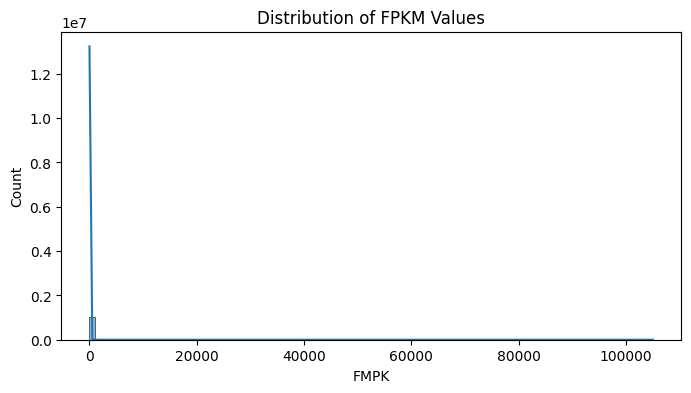

In [13]:
#flatten all values into a single list
all_values = df_filtered.values.flatten()
plt.figure(figsize=(8,4))
sns.histplot(all_values, bins=100, kde=True)
plt.title("Distribution of FPKM Values")
plt.xlabel("FMPK")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-4201938823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["var"] = df_filtered.var(axis=1)


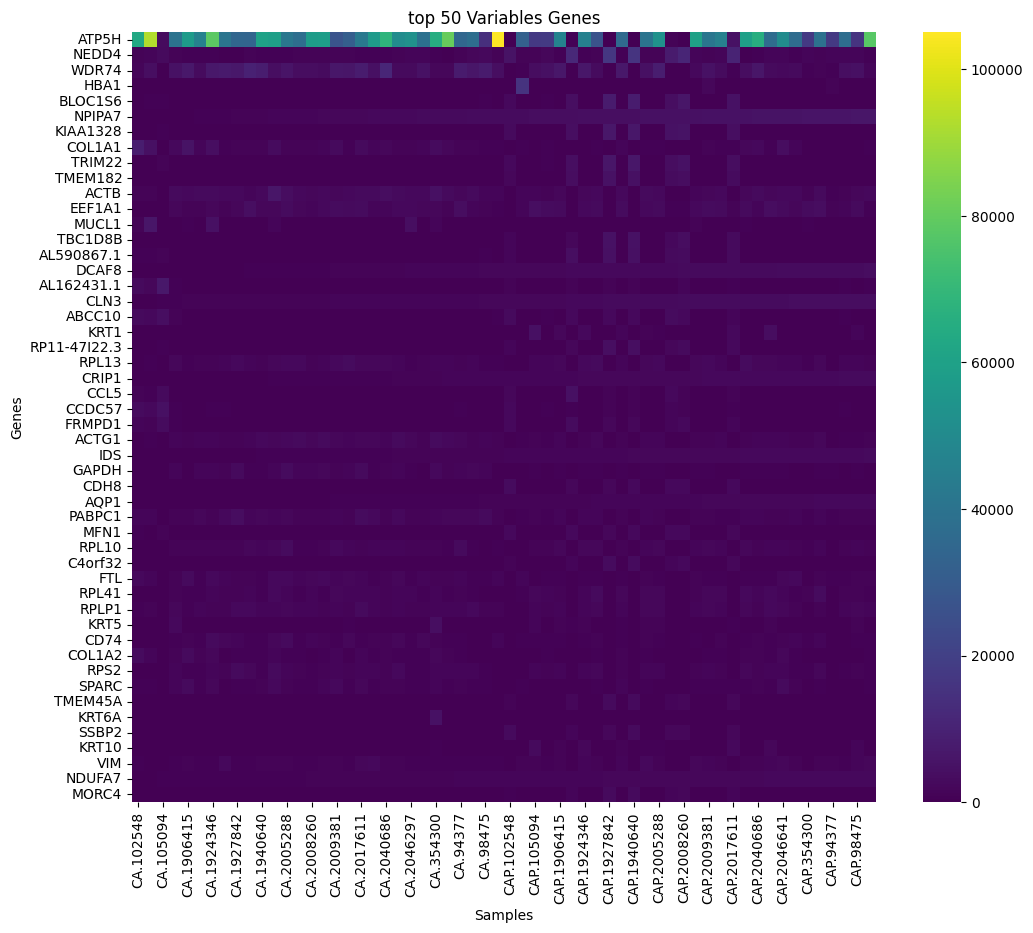

In [14]:
# compute variance for each gene
df_filtered["var"] = df_filtered.var(axis=1)

# select top 50 variable genes
top_var_genes = df_filtered.sort_values("var", ascending=False).head(50)
top_var_genes.drop(columns= ["var"], inplace=True)

# plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(top_var_genes, cmap="viridis")
plt.title("top 50 Variables Genes")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.show()


In [16]:
# Add small constant to avoid log(0)
log_df = df_filtered.apply(lambda x: np.log2(x + 1))

#check
print(log_df.head())

            CA.102548  CA.104338  CA.105094  CA.109745  CA.1906415  \
Unnamed: 0                                                           
TSPAN6       0.948601   1.570463   0.000000   2.689299    2.464668   
DPM1         0.000000   0.516015   0.000000   2.147307    3.240314   
SCYL3        2.761285   2.625270   3.286881   2.480265    3.035624   
C1orf112     1.937344   2.859970   2.127633   2.855990    2.622930   
FGR          2.536053   1.500802   0.000000   2.386811    4.076388   

            CA.1912627  CA.1924346  CA.1926760  CA.1927842  CA.1933414  ...  \
Unnamed: 0                                                              ...   
TSPAN6        2.523562    2.310340    2.195348    2.889474    3.688180  ...   
DPM1          3.252476    3.137504    3.107688    2.887525    2.825786  ...   
SCYL3         2.813525    3.329124    2.671293    2.790772    3.749534  ...   
C1orf112      3.876762    2.942984    2.650765    3.112700    3.878725  ...   
FGR           3.257011    3.835924 

In [ ]:
# prompt: Group & Summary
# groupby() + agg()
# Join Data
# merge() or pd.merge()
# Reshape Data
# melt() or df.melt
# Give me code using  Group and Summary
# For above data set

# Assuming you have a Dataframe 'df' loaded from a file like GSE183947_fpkm.csv
# and have perform some initial cleaning and filtering, like in the preceding code.
# Let's create a sample Dataframe for demonstrating purpose if 'df' is not available
# or if you want to run this code independently.

# Create a sample DataFrame if it does not exist
import pandas as pd
if 'df'not in locals():
  data = {"gene_name": ["GeneA", "GeneB", "GeneC", "GeneD", "GeneA", "GeneB"],
          "Sample_id": ["sample1", "sapmle1", "sapmle1", "sapmle2", "sapmle2", "sample2"]
          "expression": [10, 15, 20, 25, 30, 8]}
  df_sample = pd.DataFrame(data)
  df = df_sample
